In [26]:
globals()
# del <변수명> -> 삭제

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  '# import packages\n\nimport tissue.main, tissue.downstream\n\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport scanpy as sc\nimport anndata as ad\nimport os',
  '# loading\nsc_data=sc.read_h5ad("/data/kjc2/projects/P330.CSA/rds/downsampled_100_25-04-15-08-34.h5ad")\nst_data=sc.read_h5ad("/data/kjc2/projects/P330.CSA/rds/250210_CRC_BJM_0050585_Region1_25-04-14-16-53.h5ad")',
  'tissue.main.preprocess_data(sc_data, standardize=False, normalize=False)',
  'gene_names = np.intersect1d(st_data.var_names, sc_data.var_names)\nst_data = st_data[:, gene_names].copy()',
  '# hold out target gene\ntarget_gene = "plp1"\ntarget_expn = st_data[:, target_gene].X.copy()\nst_data = st_data[:, [ge

# defaulting

In [1]:
# import packages

import tissue.main, tissue.downstream

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import os

# /home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
#   warnings.warn(
# /home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
#   warnings.warn(msg, FutureWarning)


/home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


## loading

In [55]:

sc_data=sc.read_h5ad("/data/kjc2/projects/P330.CSA/rds/downsampled_100_re_processed_log1p_harmonized.h5ad")
st_data=sc.read_h5ad("/data/kjc2/projects/P330.CSA/rds/250210_CRC_BJM_0050585_Region1_25-04-14-16-53.h5ad")



## checkout

In [54]:
print(sc_data)
print(st_data)
print(sc_data.var)
print(st_data.var)

AnnData object with n_obs × n_vars = 42649 × 28476
    obs: 'dataset', 'medical_condition', 'cancer_type', 'sample_id', 'sample_type', 'tumor_source', 'replicate', 'sample_tissue', 'anatomic_region', 'anatomic_location', 'tumor_stage', 'tumor_stage_TNM', 'tumor_stage_TNM_T', 'tumor_stage_TNM_N', 'tumor_stage_TNM_M', 'tumor_size', 'tumor_dimensions', 'tumor_grade', 'histological_type', 'microsatellite_status', 'mismatch_repair_deficiency_status', 'MLH1_promoter_methylation_status', 'MLH1_status', 'KRAS_status', 'BRAF_status', 'APC_status', 'TP53_status', 'PIK3CA_status', 'SMAD4_status', 'NRAS_status', 'MSH6_status', 'FBXW7_status', 'NOTCH1_status', 'MSH2_status', 'PMS2_status', 'POLE_status', 'ERBB2_status', 'STK11_status', 'HER2_status', 'CTNNB1_status', 'BRAS_status', 'patient_id', 'sex', 'age', 'treatment_status_before_resection', 'treatment_drug', 'treatment_response', 'RECIST', 'platform', 'platform_fine', 'cellranger_version', 'reference_genome', 'matrix_type', 'enrichment_cell_ty

In [50]:
import scanpy as sc

# 예시 AnnData 객체 (adata = st_data 또는 sc_data)
adata = st_data # 또는 sc_data

# 1. 전체 요약 정보 출력 (가장 기본)
print(adata)

# 2. Jupyter Notebook/Lab 환경에서는 객체 이름만 입력해도 요약 정보가 예쁘게 나옴
# adata

# 3. 관측치(세포/스팟) 메타데이터 확인 (처음 5개 행)
print("\n--- Observations (.obs) ---")
print(adata.obs.head())
print("Columns:", adata.obs.columns)

# 4. 변수(유전자) 메타데이터 확인 (처음 5개 행)
print("\n--- Variables (.var) ---")
print(adata.var.head())
print("Index name:", adata.var_names.name) # 보통 유전자 이름
print("Columns:", adata.var.columns)

# 5. 주 데이터 행렬 (.X) 정보 확인
print("\n--- Expression Matrix (.X) ---")
print("Shape:", adata.X.shape)
print("Data type:", adata.X.dtype)
print("Is sparse:", sp.issparse(adata.X))
# print("First 5x5 values:\n", adata.X[:5, :5].toarray() if sp.issparse(adata.X) else adata.X[:5, :5]) # 실제 값 확인 (클 경우 주의)
print("Min value:", adata.X.min())
print("Max value:", adata.X.max())

# 6. 레이어(Layers) 확인
print("\n--- Layers (.layers) ---")
print(adata.layers.keys())
if 'counts' in adata.layers:
    print("Shape of 'counts' layer:", adata.layers['counts'].shape)
    print("Data type of 'counts' layer:", adata.layers['counts'].dtype)

# 7. 임베딩 등 다차원 데이터 확인 (.obsm)
print("\n--- Multi-dimensional annotations (.obsm) ---")
print(adata.obsm.keys())
if 'spatial' in adata.obsm:
    print("Shape of 'spatial':", adata.obsm['spatial'].shape)
if 'X_pca' in adata.obsm:
    print("Shape of 'X_pca':", adata.obsm['X_pca'].shape)

# 8. 비정형(Unstructured) 정보 확인 (.uns)
print("\n--- Unstructured annotations (.uns) ---")
print(adata.uns.keys())

# 9. 유전자 이름 확인 (처음 10개)
print("\n--- Var Names (first 10) ---")
print(adata.var_names[:10].to_list())

# 10. 관측치 이름(인덱스) 확인 (처음 10개)
print("\n--- Obs Names (first 10) ---")
print(adata.obs_names[:10].to_list())

AnnData object with n_obs × n_vars = 61246 × 1987
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'n_genes', 'n_counts', 'leiden_res0.8'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden_res0.8', 'leiden_res0.8_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

--- Observations (.obs) ---
            x_centroid   y_centroid  transcript_counts  control_probe_counts  \
aaaagckh-1  365.986786  2261.525879                188                     0   


## pipeline pre-processing

In [57]:
# pipeline pre-processing

# # make genes lowercase
# adata.var_names = [x.lower() for x in adata.var_names]
# RNAseq_adata.var_names = [x.lower() for x in RNAseq_adata.var_names]

# preprocess RNAseq data
# tissue.main.preprocess_data(RNAseq_adata, standardize=False, normalize=True)
tissue.main.preprocess_data(sc_data, standardize=False, normalize=False)

# subset spatial data into shared genes
gene_names = np.intersect1d(st_data.var_names, sc_data.var_names)
print(f'gene_names: {gene_names[1:100]}')
st_data = st_data[:, gene_names].copy()

# hold out target gene
target_gene = "CASR"
target_expn = st_data[:, target_gene].X.copy()
st_data = st_data[:, [gene for gene in gene_names if gene != target_gene]].copy()

gene_names: ['ABCA7' 'ABCB1' 'ABCB4' 'ABCC1' 'ABCC2' 'ABCG1' 'ABI3BP' 'ABL2' 'ABTB1'
 'ACAP1' 'ACP5' 'ADAM28' 'ADAM33' 'ADAM8' 'ADAMDEC1' 'ADAMTS1' 'ADCYAP1'
 'ADGRE2' 'ADGRE5' 'ADM' 'ADRB2' 'AEBP1' 'AFF1' 'AFF2' 'AGR3' 'AICDA'
 'AIM2' 'AKT3' 'ALOX5' 'ALPK1' 'ALPL' 'AMIGO3' 'ANGPTL4' 'ANK1' 'ANKHD1'
 'ANKRD13A' 'ANKRD13D' 'ANKRD44' 'ANKZF1' 'ANPEP' 'AOAH' 'AP1S3' 'AP5B1'
 'APOBEC3G' 'APOL3' 'AQP8' 'AQP9' 'ARC' 'ARG1' 'ARID3B' 'ARL4D' 'ARRB2'
 'ARRDC3' 'ASXL1' 'ATF3' 'ATF4' 'ATG10' 'ATG2A' 'ATM' 'ATP2B1' 'ATXN1'
 'B3GAT1' 'BACH2' 'BAG3' 'BANK1' 'BATF' 'BAZ2B' 'BBC3' 'BCAS3' 'BCL11A'
 'BCL11B' 'BCL2' 'BCL2A1' 'BCL2L11' 'BCL6' 'BCOR' 'BDNF' 'BEX2' 'BFSP2'
 'BIRC2' 'BLK' 'BLNK' 'BMP6' 'BNC2' 'BRAF' 'BTAF1' 'BTBD9' 'BTK' 'BTLA'
 'C3AR1' 'C5AR1' 'CA4' 'CALB2' 'CALCB' 'CAMP' 'CAPN3' 'CARD11' 'CARD8'
 'CASR']


KeyError: 'ZYX'

In [58]:
# hold out target gene
target_gene = "CASR"
target_expn = st_data[:, target_gene].X.copy()
st_data = st_data[:, [gene for gene in gene_names if gene != target_gene]].copy()

In [38]:
print(f'gene_names: {gene_names}')

gene_names: ['A2ML1' 'AAMP' 'AAR2' ... 'ZUP1' 'ZYG11B' 'ZYX']


# data checkout

## shape

In [59]:
print(sc_data.shape)
print(st_data.shape)

(42648, 3662)
(62941, 963)


In [60]:
print(sc_data)
print(st_data)

AnnData object with n_obs × n_vars = 42648 × 3662
    obs: 'dataset', 'medical_condition', 'cancer_type', 'sample_id', 'sample_type', 'tumor_source', 'replicate', 'sample_tissue', 'anatomic_region', 'anatomic_location', 'tumor_stage', 'tumor_stage_TNM', 'tumor_stage_TNM_T', 'tumor_stage_TNM_N', 'tumor_stage_TNM_M', 'tumor_size', 'tumor_dimensions', 'tumor_grade', 'histological_type', 'microsatellite_status', 'mismatch_repair_deficiency_status', 'MLH1_promoter_methylation_status', 'MLH1_status', 'KRAS_status', 'BRAF_status', 'APC_status', 'TP53_status', 'PIK3CA_status', 'SMAD4_status', 'NRAS_status', 'MSH6_status', 'FBXW7_status', 'NOTCH1_status', 'MSH2_status', 'PMS2_status', 'POLE_status', 'ERBB2_status', 'STK11_status', 'HER2_status', 'CTNNB1_status', 'BRAS_status', 'patient_id', 'sex', 'age', 'treatment_status_before_resection', 'treatment_drug', 'treatment_response', 'RECIST', 'platform', 'platform_fine', 'cellranger_version', 'reference_genome', 'matrix_type', 'enrichment_cell_typ

## nan

In [36]:
st_data.obs.isna().sum()  # 각 열별 NA 개수

x_centroid                    0
y_centroid                    0
transcript_counts             0
control_probe_counts          0
genomic_control_counts        0
control_codeword_counts       0
unassigned_codeword_counts    0
deprecated_codeword_counts    0
total_counts                  0
cell_area                     0
nucleus_area                  0
nucleus_count                 0
segmentation_method           0
n_genes_by_counts             0
n_genes                       0
n_counts                      0
leiden_res0.8                 0
dtype: int64

In [37]:
st_data.var.isna().sum() # 각 열별 NA 개수

gene_ids                 0
feature_types            0
genome                   0
n_cells_by_counts        0
mean_counts              0
pct_dropout_by_counts    0
total_counts             0
n_cells                  0
highly_variable          0
highly_variable_rank     0
means                    0
variances                0
variances_norm           0
mean                     0
std                      0
dtype: int64

In [24]:
st_data.obs[st_data.obs.isna().any(axis=1)] #NA가 있는 행들 보기


,x_centroid,y_centroid,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method,n_genes_by_counts,n_genes,n_counts,leiden_res0.8
aacmaokk-1,405.386169,2441.927979,459,0,0,0,0,1,459.0,40.730939,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,362,362,459.0,5
aadaljne-1,368.016602,2380.937744,57,0,0,0,0,0,57.0,20.681563,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,50,50,57.0,2
aaefagpo-1,351.166016,3623.459229,256,0,0,0,0,2,256.0,26.551876,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,229,229,256.0,2
aaehngjp-1,337.040192,3655.487793,266,0,0,0,0,0,266.0,23.390938,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,220,220,266.0,2
aaekadjc-1,344.637512,3629.710938,348,0,0,0,0,0,348.0,29.577345,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,295,295,348.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
djhekopl-1,545.984497,4863.115234,460,0,0,0,0,0,460.0,30.209532,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,339,339,460.0,0
djhjicnp-1,551.421509,4860.001465,478,0,0,0,0,0,478.0,28.403282,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,366,366,478.0,0
djhkeoke-1,555.476868,4852.318848,461,0,0,0,0,0,461.0,38.157033,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,331,331,461.0,0
djigmoec-1,523.969360,4901.240723,483,0,0,0,0,1,483.0,28.448439,NaN,0,Segmented by boundary stain (ATP1A1+CD45+E-Cad...,344,344,483.0,0


In [ ]:
st_data.var[st_data.var.isna().any(axis=1)]

In [19]:
np.isnan(st_data.layers["counts"]).sum() #특정 layers의 NA
st_data.obsm['X_pca'][np.isnan(st_data.obsm['X_pca']).any(axis=1)] #.obsm, .varm 등에서도.


KeyError: 'counts'

# 결측치 다루기

## 메타데이터

### fillna(0) fillna(median_area)

In [ ]:
st_data_original=st_data
st_data.obs['highly_variable_rank'] = st_data.obs['highly_variable_rank'].fillna(0)
median_area = st_data.var['nucleus_area'].median()
st_data.var['nucleus_area'] = st_data.var['nucleus_area'].fillna(median_area)

### 제거

#### na만 제거

In [25]:
st_data_original=st_data
st_data= st_data[~st_data.obs.isna().any(axis=1), :]
st_data = st_data[:, ~st_data.var.isna().any(axis=1)]


In [33]:
st_data= st_data[~st_data.obs.isna().any(axis=1), :]

#### 해당 메타데이터 제거

In [ ]:
st_data.obs = st_data.obs.drop(columns=['highly_variable_rank'])
st_data.var = st_data.var.drop(columns=['nucleus_area'])

In [27]:
print(st_data_original)

View of AnnData object with n_obs × n_vars = 61246 × 4959
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'n_genes', 'n_counts', 'leiden_res0.8'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden_res0.8', 'leiden_res0.8_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


## data matrix

In [42]:
import numpy as np
# NaN이 있는지

print("NaN in st_data.X:", np.isnan(st_data.X).any())
# print("NaN in sc_data.X:", np.isnan(sc_data.X).any())
# NaN in st_data.X: False
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# Cell In[39], line 4
#       1 import numpy as np
#       3 print("NaN in st_data.X:", np.isnan(st_data.X).any())
# ----> 4 print("NaN in sc_data.X:", np.isnan(sc_data.X).any())
#       6 # 만약 .X가 매우 크다면 .toarray()는 메모리 부족을 유발할 수 있습니다.
#       7 # print("NaN count in st_data.X:", np.isnan(st_data.X.toarray()).sum())
#       8 # print("NaN count in sc_data.X:", np.isnan(sc_data.X.toarray()).sum())

# TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# 만약 .X가 매우 크다면 .toarray()는 메모리 부족을 유발할 수 있습니다.
# print("NaN count in st_data.X:", np.isnan(st_data.X.toarray()).sum())
print("NaN count in sc_data.X:", np.isnan(sc_data.X.toarray()).sum())
# ---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# Cell In[40], line 7
#       1 import numpy as np
#       3 # print("NaN in st_data.X:", np.isnan(st_data.X).any())
#       4 # print("NaN in sc_data.X:", np.isnan(sc_data.X).any())
#       5 
#       6 # 만약 .X가 매우 크다면 .toarray()는 메모리 부족을 유발할 수 있습니다.
# ----> 7 print("NaN count in st_data.X:", np.isnan(st_data.X.toarray()).sum())
#       8 print("NaN count in sc_data.X:", np.isnan(sc_data.X.toarray()).sum())

# AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

NaN in st_data.X: False
NaN count in sc_data.X: 0


### 데이터 타입. TISSUE 사용을 위해서는 integer가 있으면 안 된다.

In [43]:
print("st_data.X dtype:", st_data.X.dtype)
print("sc_data.X dtype:", sc_data.X.dtype)

st_data.X dtype: float32
sc_data.X dtype: float64


In [45]:
st_data.X = st_data.X.astype(np.float32)
sc_data.X = sc_data.X.astype(np.float32)

### 제거

#### 0으로

#### 해당 열(유전자) 제거

In [ ]:
import numpy as np
import pandas as pd

# st_data에서 NaN 포함 유전자 제거
if hasattr(st_data.X, 'data'): # 희소 행렬
     genes_to_keep_st = ~np.isnan(st_data.X.A).any(axis=0) # .A로 밀집 변환 후 확인 (메모리 주의)
else: # 밀집 행렬
     genes_to_keep_st = ~np.isnan(st_data.X).any(axis=0)
print(f"Removing {np.sum(~genes_to_keep_st)} genes with NaN from st_data")
st_data = st_data[:, genes_to_keep_st].copy()

# sc_data에서 NaN 포함 유전자 제거 (동일 방식)
if hasattr(sc_data.X, 'data'): # 희소 행렬
     genes_to_keep_sc = ~np.isnan(sc_data.X.A).any(axis=0) # .A로 밀집 변환 후 확인 (메모리 주의)
else: # 밀집 행렬
     genes_to_keep_sc = ~np.isnan(sc_data.X).any(axis=0)
print(f"Removing {np.sum(~genes_to_keep_sc)} genes with NaN from sc_data")
sc_data = sc_data[:, genes_to_keep_sc].copy()

# target_gene이 제거되지 않았는지 확인 후 TISSUE 실행
if target_gene in st_data.var_names and target_gene in sc_data.var_names:
     # tissue.main.predict_gene_expression(...)
     pass
else:
     print(f"Target gene {target_gene} was removed due to NaN values.")

#### 해당 셀 제거: 공간 데이터(st_data)에서는 공간적 위치 정보를 잃을 수 있으므로 신중해야 합니다.

In [ ]:
import numpy as np

# st_data에서 NaN 포함 셀/스팟 제거
if hasattr(st_data.X, 'data'): # 희소 행렬
    cells_to_keep_st = ~np.isnan(st_data.X.A).any(axis=1) # .A 사용 주의
else: # 밀집 행렬
    cells_to_keep_st = ~np.isnan(st_data.X).any(axis=1)
print(f"Removing {np.sum(~cells_to_keep_st)} spots/cells with NaN from st_data")
st_data = st_data[cells_to_keep_st, :].copy()

# sc_data에서 NaN 포함 셀 제거 (동일 방식)
if hasattr(sc_data.X, 'data'): # 희소 행렬
    cells_to_keep_sc = ~np.isnan(sc_data.X.A).any(axis=1) # .A 사용 주의
else: # 밀집 행렬
    cells_to_keep_sc = ~np.isnan(sc_data.X).any(axis=1)
print(f"Removing {np.sum(~cells_to_keep_sc)} cells with NaN from sc_data")
sc_data = sc_data[cells_to_keep_sc, :].copy()

# TISSUE 함수 다시 실행
# tissue.main.predict_gene_expression(...)

#### 데이터 형식 일치시키기

In [ ]:
import numpy as np
import scipy.sparse as sp

# sc_data.X의 데이터 타입을 float32로 변경
if isinstance(sc_data.X, np.ndarray):
    sc_data.X = sc_data.X.astype(np.float32)
elif sp.issparse(sc_data.X):
    # 희소 행렬의 경우, data 속성의 타입만 변경
    sc_data.X = sc_data.X.astype(np.float32)
else:
    # 다른 타입일 경우 밀집 배열로 변환 후 변경 (메모리 주의)
    print("Warning: Converting sc_data.X to dense array for dtype change.")
    sc_data.X = sc_data.X.toarray().astype(np.float32)

# st_data.X가 이미 float32가 아니라면 변환 (이미 하셨으므로 확인용)
if st_data.X.dtype != np.float32:
     if isinstance(st_data.X, np.ndarray):
        st_data.X = st_data.X.astype(np.float32)
     elif sp.issparse(st_data.X):
        st_data.X = st_data.X.astype(np.float32)
     else:
        print("Warning: Converting st_data.X to dense array for dtype change.")
        st_data.X = st_data.X.toarray().astype(np.float32)


print("After conversion:")
print("st_data.X dtype:", st_data.X.dtype)
print("sc_data.X dtype:", sc_data.X.dtype)

#### NaN 재확인 - 형식 고려

In [47]:
import numpy as np
import scipy.sparse as sp

def check_nan_inf(adata, name):
    print(f"--- Checking {name} ({type(adata.X)}) ---")
    has_nan = False
    has_inf = False

    if sp.issparse(adata.X):
        # 희소 행렬: data 속성에서 NaN/inf 확인
        has_nan = np.isnan(adata.X.data).any()
        has_inf = np.isinf(adata.X.data).any()
        print(f"NaN in {name}.X.data: {has_nan} (count: {np.isnan(adata.X.data).sum()})")
        print(f"Inf in {name}.X.data: {has_inf} (count: {np.isinf(adata.X.data).sum()})")
    elif isinstance(adata.X, np.ndarray):
        # 밀집 행렬: 전체 행렬에서 NaN/inf 확인
        has_nan = np.isnan(adata.X).any()
        has_inf = np.isinf(adata.X).any()
        print(f"NaN in {name}.X: {has_nan} (count: {np.isnan(adata.X).sum()})")
        print(f"Inf in {name}.X: {has_inf} (count: {np.isinf(adata.X).sum()})")
    else:
        print(f"Warning: Unsupported type for {name}.X: {type(adata.X)}. Skipping NaN/Inf check.")

    # 레이어 확인 (sc_data에 'counts' 레이어가 있으므로 확인)
    if 'counts' in adata.layers:
        layer_data = adata.layers['counts']
        layer_has_nan = False
        layer_has_inf = False
        if sp.issparse(layer_data):
             layer_has_nan = np.isnan(layer_data.data).any()
             layer_has_inf = np.isinf(layer_data.data).any()
             print(f"NaN in {name}.layers['counts'].data: {layer_has_nan} (count: {np.isnan(layer_data.data).sum()})")
             print(f"Inf in {name}.layers['counts'].data: {layer_has_inf} (count: {np.isinf(layer_data.data).sum()})")
        elif isinstance(layer_data, np.ndarray):
             layer_has_nan = np.isnan(layer_data).any()
             layer_has_inf = np.isinf(layer_data).any()
             print(f"NaN in {name}.layers['counts']: {layer_has_nan} (count: {np.isnan(layer_data).sum()})")
             print(f"Inf in {name}.layers['counts']: {layer_has_inf} (count: {np.isinf(layer_data).sum()})")


check_nan_inf(st_data, "st_data")
check_nan_inf(sc_data, "sc_data")

--- Checking st_data (<class 'numpy.ndarray'>) ---
NaN in st_data.X: False (count: 0)
Inf in st_data.X: False (count: 0)
--- Checking sc_data (<class 'scipy.sparse._csr.csr_matrix'>) ---
NaN in sc_data.X.data: False (count: 0)
Inf in sc_data.X.data: False (count: 0)
NaN in sc_data.layers['counts'].data: False (count: 0)
Inf in sc_data.layers['counts'].data: False (count: 0)


# SpaGE spatial gene expression prediction

In [61]:
# SpaGE spatial gene expression prediction

tissue.main.predict_gene_expression (st_data, sc_data, [target_gene],method="spage", n_folds=10, n_pv=10)
# /home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
#   return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
# /home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
#   return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)

/home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/jaecheon/anaconda3/envs/scenvi/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. T

In [ ]:
# SpaGE prediction vs actual

ValueError: 'c' argument has 62941 elements, which is inconsistent with 'x' and 'y' with size 61246.

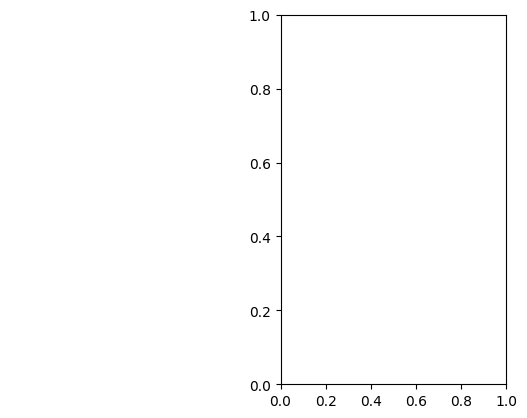

In [62]:
# Visualizing predicted and actual expression side by side

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.axis('off')
cmap = target_expn
cmap[cmap<0] = 0
cmap = np.log1p(cmap)
cmap[cmap > np.percentile(cmap,95)] = np.percentile(cmap,95)
im = ax1.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,rasterized=True)
ax1.set_title('Actual', fontsize = 12)

cbar = fig.colorbar(im)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Log Expression', rotation=270)

ax2.axis('off')
cmap = adata.obsm['spage_predicted_expression'][target_gene].values
cmap[cmap<0] = 0
cmap = np.log1p(cmap)
cmap[cmap > np.percentile(cmap,95)] = np.percentile(cmap,95)
im = ax2.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],s=1,c=cmap,rasterized=True)
ax2.set_title('Predicted', fontsize = 12)

cbar = fig.colorbar(im)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Log Expression', rotation=270)

plt.suptitle("SpaGE Prediction", fontsize=16)
plt.tight_layout()
plt.show()